In [ ]:
import pandas as pd
import scipy

In [ ]:
train = pd.read_csv('prep_train.csv')
val = pd.read_csv('prep_val.csv')

In [ ]:
df = pd.concat([train, val], axis=0)

In [ ]:
from scipy import stats

In [ ]:
groupby_class = df.groupby('class')

In [ ]:
groupby_class.mean() #POS None Text посмотреть, pos NOUN text, POS INFN text, pos CONJ text, len_text

,id,len_text_text,count_punct_text,count_numbers_text,count_digits_text,count_uppercase_text,count_lowercase_text,avg_word_len_text,mean_ru_vowel_occurance_text,mean_ru_consonant_occurance_text,mean_en_vowel_occurance_text,mean_en_consonant_occurance_text,count_space_text,count_kirr_text,count_lat_text,POS_NOUN_text,POS_ADJF_text,POS_PREP_text,POS_None_text,POS_PRCL_text,POS_NPRO_text,POS_INFN_text,POS_ADVB_text,POS_CONJ_text,POS_VERB_text,POS_PRED_text,POS_ADJS_text,POS_PRTF_text,POS_PRTS_text,POS_INTJ_text,POS_NUMR_text,POS_GRND_text,POS_COMP_text,text_dv_0,text_dv_1,text_dv_2,text_dv_3,text_dv_4,text_dv_5,text_dv_6,...,text_dv_60,text_dv_61,text_dv_62,text_dv_63,text_dv_64,text_dv_65,text_dv_66,text_dv_67,text_dv_68,text_dv_69,text_dv_70,text_dv_71,text_dv_72,text_dv_73,text_dv_74,text_dv_75,text_dv_76,text_dv_77,text_dv_78,text_dv_79,text_dv_80,text_dv_81,text_dv_82,text_dv_83,text_dv_84,text_dv_85,text_dv_86,text_dv_87,text_dv_88,text_dv_89,text_dv_90,text_dv_91,text_dv_92,text_dv_93,text_dv_94,text_dv_95,text_dv_96,text_dv_97,text_dv_98,text_dv_99
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,107677.127160,221.471371,0.034003,0.005677,0.014580,0.031719,0.779590,5.133589,2.023490,2.695057,0.020933,0.032212,0.133110,0.801256,0.011443,12.399646,5.312995,4.726129,4.654922,2.035749,2.247809,1.884765,2.258726,3.152976,2.992940,1.262504,1.432982,1.776514,1.534876,1.168455,1.413378,1.352462,1.253570,-0.020094,0.016279,0.028588,0.017678,0.021778,-0.073108,-0.004054,...,-0.012063,-0.007068,-0.005054,-0.023035,-0.065320,0.046466,0.027179,0.060645,-0.033072,0.016764,0.014449,0.032540,0.047002,-0.002173,0.019973,-0.002361,-0.006400,0.012190,-0.013558,0.001768,-0.047854,-0.020913,-0.049304,0.067869,-0.032504,-0.028302,0.039133,0.038070,0.051267,0.035985,0.044254,-0.007700,-0.001102,-0.007752,0.071833,0.034194,0.009787,-0.025987,0.014627,0.010927
M,107343.316925,236.906689,0.029894,0.004190,0.011392,0.029219,0.789755,5.126580,2.025573,2.684238,0.036401,0.056745,0.134956,0.802054,0.017249,13.013796,5.043666,4.520689,9.428790,2.270257,2.589960,2.109831,2.645651,2.879713,2.676903,1.322062,1.369480,1.380312,1.411813,1.164668,1.312199,1.154766,1.319849,-0.013532,0.008016,0.029398,0.018920,0.012103,-0.066595,-0.002324,...,-0.011368,0.008378,-0.009568,-0.030879,-0.057281,0.037896,0.010655,0.057783,-0.020738,0.010327,0.014497,0.034481,0.046865,-0.005996,0.023842,-0.004502,-0.007012,0.009031,-0.016552,-0.002064,-0.045018,-0.012780,-0.050044,0.057632,-0.031559,-0.021933,0.036868,0.032494,0.056447,0.031464,0.037655,-0.008176,0.005012,-0.000706,0.061602,0.041447,0.005815,-0.028563,0.012548,0.007196


In [ ]:
describe_fields = ["POS_None_text", "POS_INFN_text", "POS_CONJ_text", "len_text_text"]

print("===== train: human")
print(df[df["class"] == "H"][describe_fields].describe())
print("===== train: machine")
print(df[df["class"] == "M"][describe_fields].describe())

===== train: human
       POS_None_text  POS_INFN_text  POS_CONJ_text  len_text_text
count   34001.000000   17972.000000   44190.000000   75291.000000
mean        4.654922       1.884765       3.152976     221.471371
std         6.704042       1.963332       4.280672     341.369795
min         1.000000       1.000000       1.000000       7.000000
25%         1.000000       1.000000       1.000000      59.000000
50%         2.000000       1.000000       2.000000      95.000000
75%         5.000000       2.000000       3.000000     162.000000
max       112.000000      30.000000      56.000000    2963.000000
===== train: machine
       POS_None_text  POS_INFN_text  POS_CONJ_text  len_text_text
count   30740.000000   23081.000000   46863.000000   75286.000000
mean        9.428790       2.109831       2.879713     236.906689
std        24.848542       2.301162       3.367010     389.235788
min         1.000000       1.000000       1.000000       8.000000
25%         1.000000       1.000000 

In [ ]:
df = df.fillna(0)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#subset_h = df[(df['class'] == 'H')]
#subset_m = df[(df['class'] == 'M')]

2-sample t-tests

In [ ]:
human_pos = df[df['class'] == 'H']['POS_None_text']
machine_pos = df[df['class'] == 'M']['POS_None_text']

In [ ]:
human_pos.head()

0    0.0
1    3.0
2    0.0
5    0.0
6    0.0
Name: POS_None_text, dtype: float64

In [ ]:
stats.ttest_ind(human_pos, machine_pos) #есть

Ttest_indResult(statistic=-27.72231389539626, pvalue=1.0014764137322084e-168)

In [ ]:
stats.ttest_ind(df[df['class'] == 'H']['POS_CONJ_text'], df[df['class'] == 'M']['POS_CONJ_text']) #есть

Ttest_indResult(statistic=3.3815646424256087, pvalue=0.0007209258943904499)

In [ ]:
stats.ttest_ind(df[df['class'] == 'H']['POS_INFN_text'], df[df['class'] == 'M']['POS_INFN_text']) #есть

Ttest_indResult(statistic=-26.57223151016148, pvalue=3.2523744062445617e-155)

In [ ]:
stats.ttest_ind(df[df['class'] == 'H']['len_text_text'], df[df['class'] == 'M']['len_text_text']) #есть

Ttest_indResult(statistic=-8.18055550017655, pvalue=2.847092003931036e-16)

In [ ]:
stats.ttest_ind(df[df['class'] == 'H']['count_punct_text'], df[df['class'] == 'M']['count_punct_text']) #Ээээ поч есть 

Ttest_indResult(statistic=37.179912581751786, pvalue=3.3899070323768653e-301)

In [ ]:
stats.ttest_ind(df[df['class'] == 'H']['count_numbers_text'], df[df['class'] == 'M']['count_numbers_text'])

Ttest_indResult(statistic=23.906055272649628, pvalue=4.5590549241098247e-126)

In [ ]:
#нужно ли нам смотреть, какие фичи значимо отличаются друг от друга?

In [ ]:
#from statsmodels.formula.api import ols
#model = ols("POS_None_text ~ class + 1", df).fit()

SyntaxError: ignored

In [ ]:
#import pingouin as pg
#aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
#print(aov)

In [ ]:
#from scipy.stats.mstats_basic import f_oneway
#f_oneway(human_pos, machine_pos)

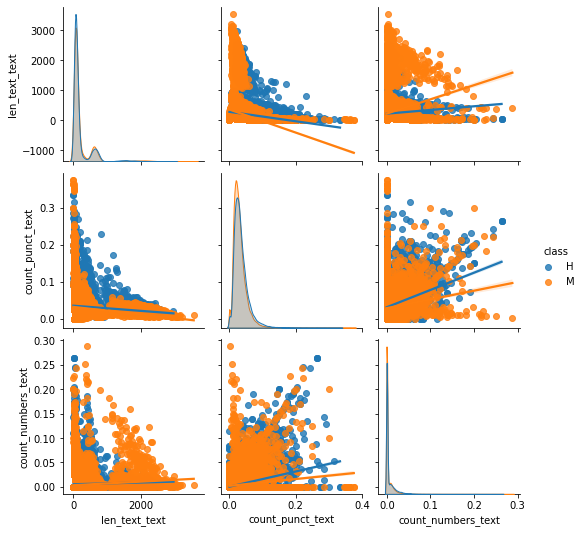

In [ ]:
import seaborn
seaborn.pairplot(df, vars=['len_text_text', 'count_punct_text', 'count_numbers_text'],
                 kind='reg', hue='class')  